# Image classification with TensorFlow 

Based on an original notebook by the TensorFlow authors, licensed under Apache 2.0.

**Note: You need to sign in to Google to run this notebook.**

Use **Shift + Enter** to run the cells. When prompted, click **Run anyway** then **Yes**. Try it on this cell...

In [1]:
print("Check runtime type!")

Check runtime type!


## Overview

In this notebook, we're going to classify some images of fossils... in fewer than 80 lines of code.

A 'notebook' is an interactive coding and note-taking environment. We're going to be using some cutting edge technology, right in your browser. We will see:

- A deep neural network in action.
- Google's TensorFlow deep learning library.
- Google's 'tensor processing unit' (TPU) deep learning hardware acceleration.
- All of this is running on Google's cloud infrastructure, for free.

There are fewer than 80 lines of code altogether.

## Load the data

We'll begin by downloading the dataset. Run this cell:

In [2]:
import requests
import numpy as np
from io import BytesIO

X_ = requests.get("https://s3.amazonaws.com/agilegeo/geocomp/image_X.npy")
y_ = requests.get("https://s3.amazonaws.com/agilegeo/geocomp/integer_y.npy")

X = np.load(BytesIO(X_.content))
y = np.load(BytesIO(y_.content))

print("Data loaded!")

Data loaded!


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.316)

X_train.shape

(400, 32, 32, 1)

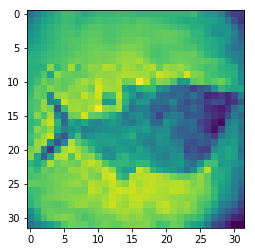

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :, 0])

In [4]:
y_train

array([1, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2,
       2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2,
       2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0,

## Shallow learning model

In [ ]:
X_train.shape, X_val.shape

In [15]:
from sklearn.svm import SVC



Evaluating the model, we see that we got about 60% accuracy:

## Deep learning model

The following example uses a standard conv-net that has 3 layers with drop-out and batch normalization between each layer.

In [ ]:
import tensorflow as tf

def create_model(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.BatchNormalization(input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(32))
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(3))
    model.add(tf.keras.layers.Activation('softmax'))
    return model

## Train on the TPU

To begin training, construct the model on the TPU and then compile it.

The following code demonstrates the use of a generator function and `fit_generator` to train the model.  Alternately, you can pass in `x_train` and `y_train` to `tpu_model.fit()`.

In [ ]:
import os
from contextlib import contextmanager


try:
    resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
    tf.contrib.distribute.initialize_tpu_system(resolver)
    strategy = tf.contrib.distribute.TPUStrategy(resolver)
except:
    strategy = None

none_context = contextmanager(lambda: iter([None]))()

with (strategy.scope() if strategy else none_context):
    model = create_model(input_shape=X_train.shape[1:])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(
    X_train.astype(np.float32),
    y_train.astype(np.float32),
    epochs=32,
    steps_per_epoch=50,
    validation_data=(X_val.astype(np.float32), y_val.astype(np.float32)),
    validation_freq=32
)

model.save_weights('./fossils.h5', overwrite=True)

## Check the results (inference)

Now that you are done training, see how well the model can predict fossil types.

In [ ]:
LABEL_NAMES = ['ammonites', 'fish', 'trilobites']

cpu_model = create_model(X_train.shape[1:])
cpu_model.load_weights('./fossils.h5')

def plot_predictions(images, predictions, actuals):
    n = images.shape[0]
    nc = int(np.ceil(n / 4))
    f, axes = plt.subplots(nc, 4)
    for i in range(nc * 4):
        y = i // 4
        x = i % 4
        axes[x, y].axis('off')

        pred = LABEL_NAMES[np.argmax(predictions[i])]
        actual = LABEL_NAMES[actuals[i]]
        conf = np.max(predictions[i])
        if i > n:
            continue
        axes[x, y].imshow(images[i])
        axes[x, y].set_title("{} {:.3f}\n {}".format(pred, conf, actual))

    plt.gcf().set_size_inches(10, 12)  

plot_predictions(np.squeeze(X_val[:16]), 
                 cpu_model.predict(X_val[:16]),
                 np.squeeze(y_val[:16])
                )